# Visual Analysis of Popular Spotify by Year (1999-2019)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
spotify = pd.read_csv('spotify_top_songs.csv')

In [3]:
spotify.head(20)

,artist,song,duration_sec,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,OPM,Heaven Is a Halfpipe (If I Die),257,True,2000,56,0.743,0.894,8,-6.886,1,0.0349,0.07550,0.002830,0.3670,0.7700,95.900,Rock
1,Mystikal,Shake Ya Ass,257,True,2000,57,0.914,0.607,7,-5.658,1,0.3200,0.06260,0.000000,0.0515,0.6660,98.054,Hip-Hop/Rap
2,Outkast,Ms. Jackson,271,True,2000,82,0.843,0.806,4,-5.946,0,0.2690,0.14300,0.000000,0.0771,0.6130,94.948,Hip-Hop/Rap
3,Outkast,The Whole World (feat. Killer Mike),295,True,2001,51,0.814,0.852,2,-6.176,1,0.4010,0.09580,0.000001,0.0288,0.7170,184.682,Hip-Hop/Rap
4,Erick Sermon,Music (feat. Marvin Gaye),223,True,2001,57,0.897,0.466,10,-9.053,0,0.2030,0.18700,0.000001,0.0757,0.8840,100.010,Hip-Hop/Rap
5,Ludacris,Southern Hospitality (Featuring Pharrell),301,True,2000,54,0.623,0.896,0,-4.719,1,0.2470,0.03500,0.000000,0.0941,0.6130,95.158,Hip-Hop/Rap
6,So Solid Crew,21 Seconds,303,True,2001,51,0.607,0.637,1,-11.072,1,0.2410,0.01910,0.000000,0.1240,0.8180,137.030,Dance/Electronic
7,Ludacris,Rollout (My Business),297,True,2001,60,0.921,0.668,7,-8.730,1,0.2350,0.09490,0.000000,0.5920,0.8920,131.059,Hip-Hop/Rap
8,Trick Daddy,I'm a Thug,254,True,2001,59,0.933,0.561,11,-5.961,1,0.1220,0.02750,0.000000,0.1020,0.5860,139.976,Hip-Hop/Rap
9,Staind,It's Been Awhile,265,True,2001,64,0.509,0.774,6,-4.054,1,0.0338,0.00189,0.000549,0.1430,0.0824,116.529,Rock


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1845 non-null   object 
 1   song              1845 non-null   object 
 2   duration_sec      1845 non-null   int64  
 3   explicit          1845 non-null   bool   
 4   year              1845 non-null   int64  
 5   popularity        1845 non-null   int64  
 6   danceability      1845 non-null   float64
 7   energy            1845 non-null   float64
 8   key               1845 non-null   int64  
 9   loudness          1845 non-null   float64
 10  mode              1845 non-null   int64  
 11  speechiness       1845 non-null   float64
 12  acousticness      1845 non-null   float64
 13  instrumentalness  1845 non-null   float64
 14  liveness          1845 non-null   float64
 15  valence           1845 non-null   float64
 16  tempo             1845 non-null   float64


## Number of Songs Per Genre:

In [5]:
df_1 = spotify['genre'].value_counts()
print(df_1)

Pop                  680
Hip-Hop/Rap          479
Dance/Electronic     233
R&B/Soul             196
Rock                 132
Alternative           67
Latin                 28
Country               16
Reggae                10
Singer/Songwriter      2
Indian                 1
Musicals               1
Name: genre, dtype: int64


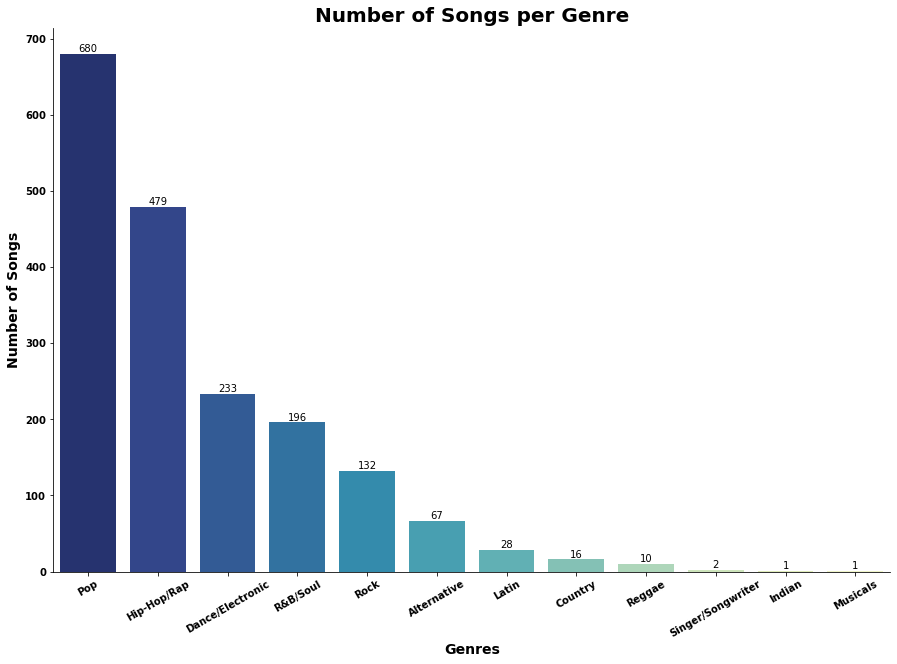

In [6]:
genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'R&B/Soul', 'Rock', 'Alternative', 'Latin', 'Country', 'Reggae',
          'Singer/Songwriter', 'Indian', 'Musicals']

plt.figure(figsize = (15,10))
sns.barplot(data = spotify, x = genres, y = df_1, palette = 'YlGnBu_r')
plt.xticks(rotation = 30, fontweight = 'bold')
plt.xlabel('Genres', fontsize = 14, fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.ylabel('Number of Songs', fontsize = 14, fontweight = 'bold')
plt.title('Number of Songs per Genre', fontsize = 20, fontweight = 'bold')

for i in range(len(genres)):
    plt.text(i, df_1[i], df_1[i], ha = 'center', va = 'bottom')
    
sns.despine()
plt.show()

## Top 20 Most Popular Artists:

In [7]:
df_2 = spotify[['artist', 'popularity']]
df_3 = df_2.groupby('artist')['popularity'].mean().sort_values(ascending = False).reset_index()
top_20_artists = df_3.head(20)
print(top_20_artists)

               artist  popularity
0           Tom Odell   88.000000
1   The Neighbourhood   87.000000
2              WILLOW   86.000000
3       Lewis Capaldi   84.000000
4       Gesaffelstein   84.000000
5         Tame Impala   83.000000
6   Foster The People   82.000000
7      French Montana   82.000000
8                MKTO   82.000000
9         girl in red   82.000000
10      Alec Benjamin   82.000000
11       XXXTENTACION   81.500000
12             Hozier   81.000000
13       Lil Uzi Vert   81.000000
14             Regard   81.000000
15  Twenty One Pilots   81.000000
16      Billie Eilish   80.666667
17       Paloma Faith   80.000000
18   Chord Overstreet   80.000000
19          Vance Joy   80.000000


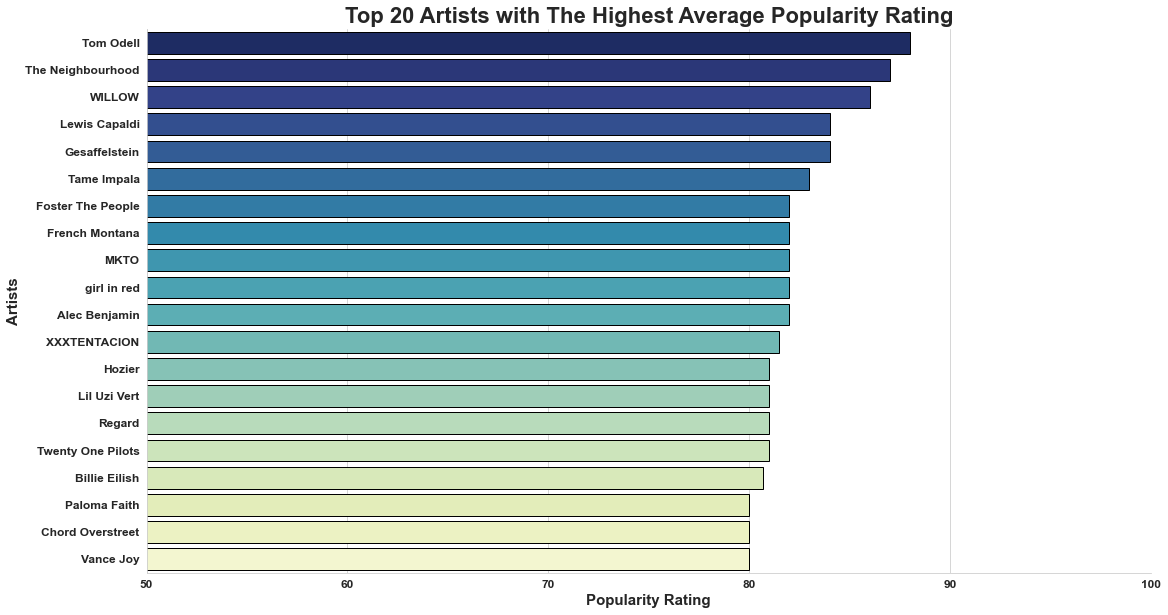

In [8]:
plt.figure(figsize = (18,10))
sns.set_style('whitegrid')

sns.barplot(data = top_20_artists, x = top_20_artists['popularity'], y = top_20_artists['artist'], palette = 'YlGnBu_r',
           edgecolor = 'black')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.ylabel('Artists', fontsize = 15, fontweight = 'bold')
plt.xticks(fontweight = 'bold', fontsize = 12)
plt.xlabel('Popularity Rating', fontsize = 15, fontweight = 'bold')
plt.xlim(50,100)
plt.title('Top 20 Artists with The Highest Average Popularity Rating', fontsize = 22, fontweight = 'bold')

sns.despine()
plt.show()

## Most Commonly Used BPM Ranges:

In [9]:
df_4 = spotify['tempo'].value_counts()
df_5 = (spotify['tempo'].max()) - (spotify['tempo'].min())
print(df_4)
print("Range of different BPM's:", round(df_5, 2))

140.022    4
127.999    3
128.008    3
121.996    3
100.011    3
          ..
82.034     1
94.050     1
96.103     1
109.974    1
100.618    1
Name: tempo, Length: 1748, dtype: int64
Range of different BPM's: 150.83


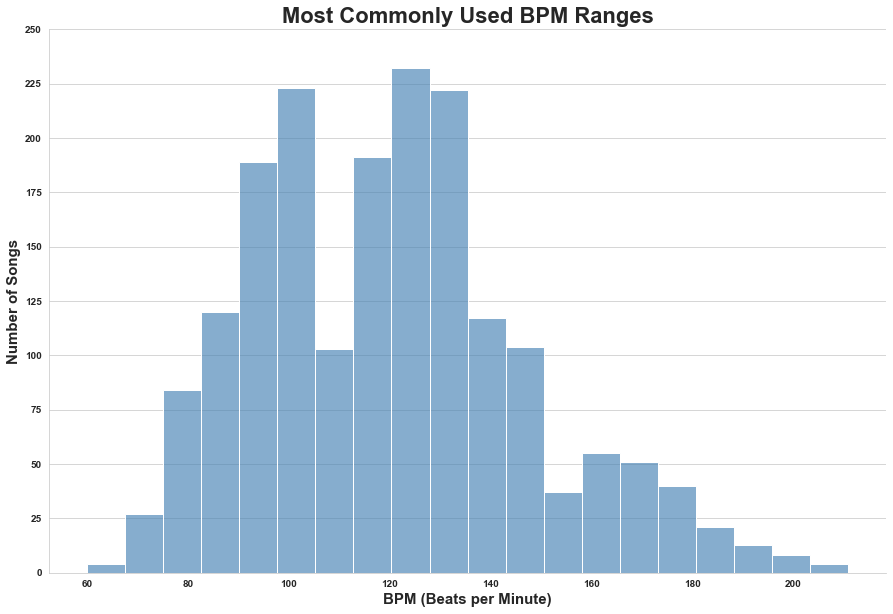

Entire Range of BPM's Used = 150.8


In [10]:
plt.figure(figsize= (15,10))
sns.set_style('whitegrid')
sns.histplot(data = spotify, x = spotify['tempo'], bins = 20, color = 'SteelBlue', alpha = 0.65)
plt.grid(axis = 'x')
plt.yticks([0,25,50,75,100,125,150,175,200,225,250], fontweight = 'bold')
plt.ylabel('Number of Songs', fontsize = 15, fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.xlabel('BPM (Beats per Minute)', fontsize = 15, fontweight = 'bold')
plt.title('Most Commonly Used BPM Ranges', fontsize = 22, fontweight = 'bold')

sns.despine()
plt.show()
print("Entire Range of BPM's Used =", round(df_5, 1))

## Number of Explicit Songs Per Genre:

In [11]:
df_6 = spotify.loc[spotify['explicit'] == True]
df_7 = df_6['genre'].value_counts()
print(df_7)
# Won't make a good Pie Chart; need to group the smaller genres into one group

Hip-Hop/Rap         348
Pop                  86
R&B/Soul             37
Dance/Electronic     20
Rock                 14
Alternative           5
Latin                 3
Reggae                1
Name: genre, dtype: int64


In [12]:
cond_1 = spotify['genre'] == 'Dance/Electronic'
cond_2 = spotify['genre'] == 'Rock'
cond_3 = spotify['genre'] == 'Alternative'
cond_4 = spotify['genre'] == 'Latin'
cond_5 = spotify['genre'] == 'Reggae'

spotify.loc[cond_1, 'genre'] = 'Other'
spotify.loc[cond_2, 'genre'] = 'Other'
spotify.loc[cond_3, 'genre'] = 'Other'
spotify.loc[cond_4, 'genre'] = 'Other'
spotify.loc[cond_5, 'genre'] = 'Other'
df_10 = spotify.loc[spotify['explicit'] == True]
df_11 = df_10['genre'].value_counts()
print(df_11)

Hip-Hop/Rap    348
Pop             86
Other           43
R&B/Soul        37
Name: genre, dtype: int64


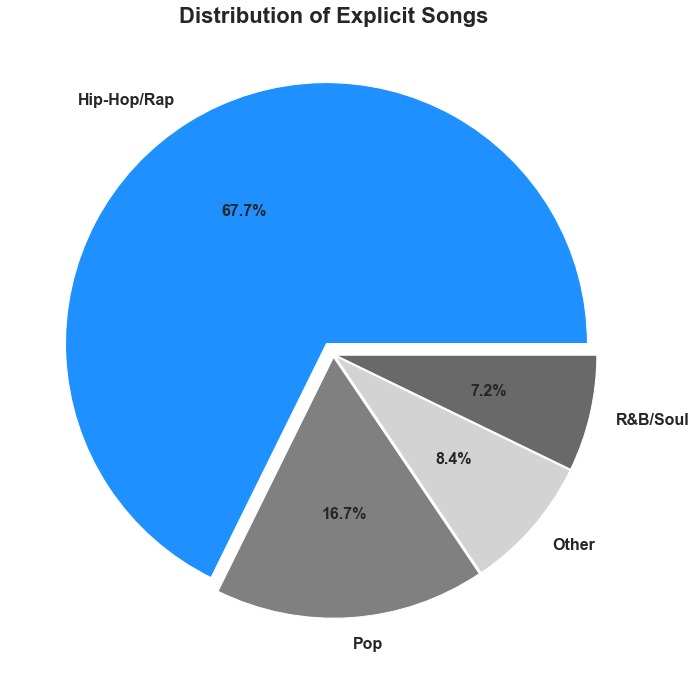

In [13]:
labels = ['Hip-Hop/Rap', 'Pop', 'Other', 'R&B/Soul']
colors = ['DodgerBlue', 'Gray', 'LightGray', 'DimGray']
plt.figure(figsize = (12,12))
plt.pie(df_11, labels = labels, autopct='%.1f%%', explode = (0.05, 0.01, 0.01, 0.01), colors = colors,
       textprops={'fontsize': 16, 'fontweight': 'bold'})
plt.title('Distribution of Explicit Songs', fontweight = 'bold', fontsize = 22)
plt.show()

## Which "Years" Are Still The Most Listened To?:

In [14]:
df_8 = spotify[spotify['year'].between(1999, 2019)]
df_9 = df_8['year'].value_counts()
print(df_9)

2012    109
2017    108
2001    104
2018     99
2005     97
2010     97
2011     93
2004     92
2006     91
2016     90
2014     90
2019     88
2007     86
2003     85
2008     85
2013     83
2009     80
2015     80
2002     80
2000     67
1999     37
Name: year, dtype: int64


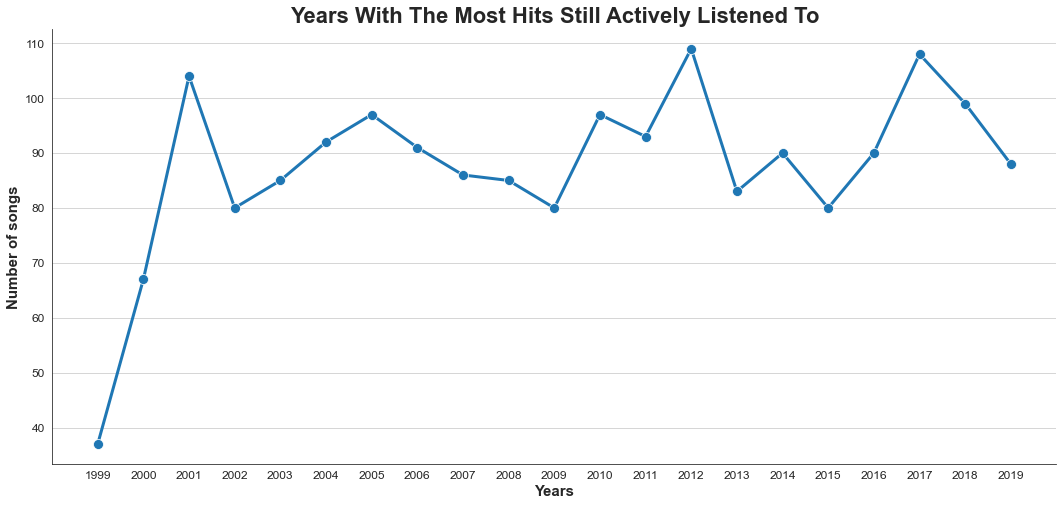

In [15]:
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 
         2014, 2015, 2016, 2017, 2018, 2019]

plt.figure(figsize = (18,8))
sns.set_style('white')

sns.lineplot(data = df_9, marker = 'o', markersize = 10, linewidth = 3)
plt.xticks(years, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Years', fontweight = 'bold', fontsize = 15)
plt.ylabel('Number of songs', fontweight = 'bold', fontsize = 15)
plt.title('Years With The Most Hits Still Actively Listened To', fontweight = 'bold', fontsize = 22)
plt.grid(axis = 'y')
sns.despine()
plt.show()

## What Are The Most Common Characteristics Among The Most Popular Songs?:

In [16]:
# Popularity vs. [danceability, energy, key, loudness, speechiness, acousticness, liveness, valence]

# danceability = Danceability describes how suitable a track is for dancing based on a combination 
#                of musical elements including tempo, rhythm stability, beat strength, and overall 
#                regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

# energy = Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

# key = The key the track is in. Integers map to pitches using standard Pitch Class notation. 
#       E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

# loudness = The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire 
#            track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound 
#            that is the primary psychological correlate of physical strength (amplitude). Values typically range 
#            between -60 and 0 db.

# speechiness = Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the 
#               recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 
#               0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 
#               describe tracks that may contain both music and speech, either in sections or layered, including such 
#               cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

# acousticness = A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence 
#                the track is acoustic.

# liveness = Detects the presence of an audience in the recording. Higher liveness values represent an increased 
#            probability that the track was performed live. A value above 0.8 provides strong likelihood that the track 
#            is live.

# valence = A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence 
#           sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative 
#           (e.g. sad, depressed, angry).

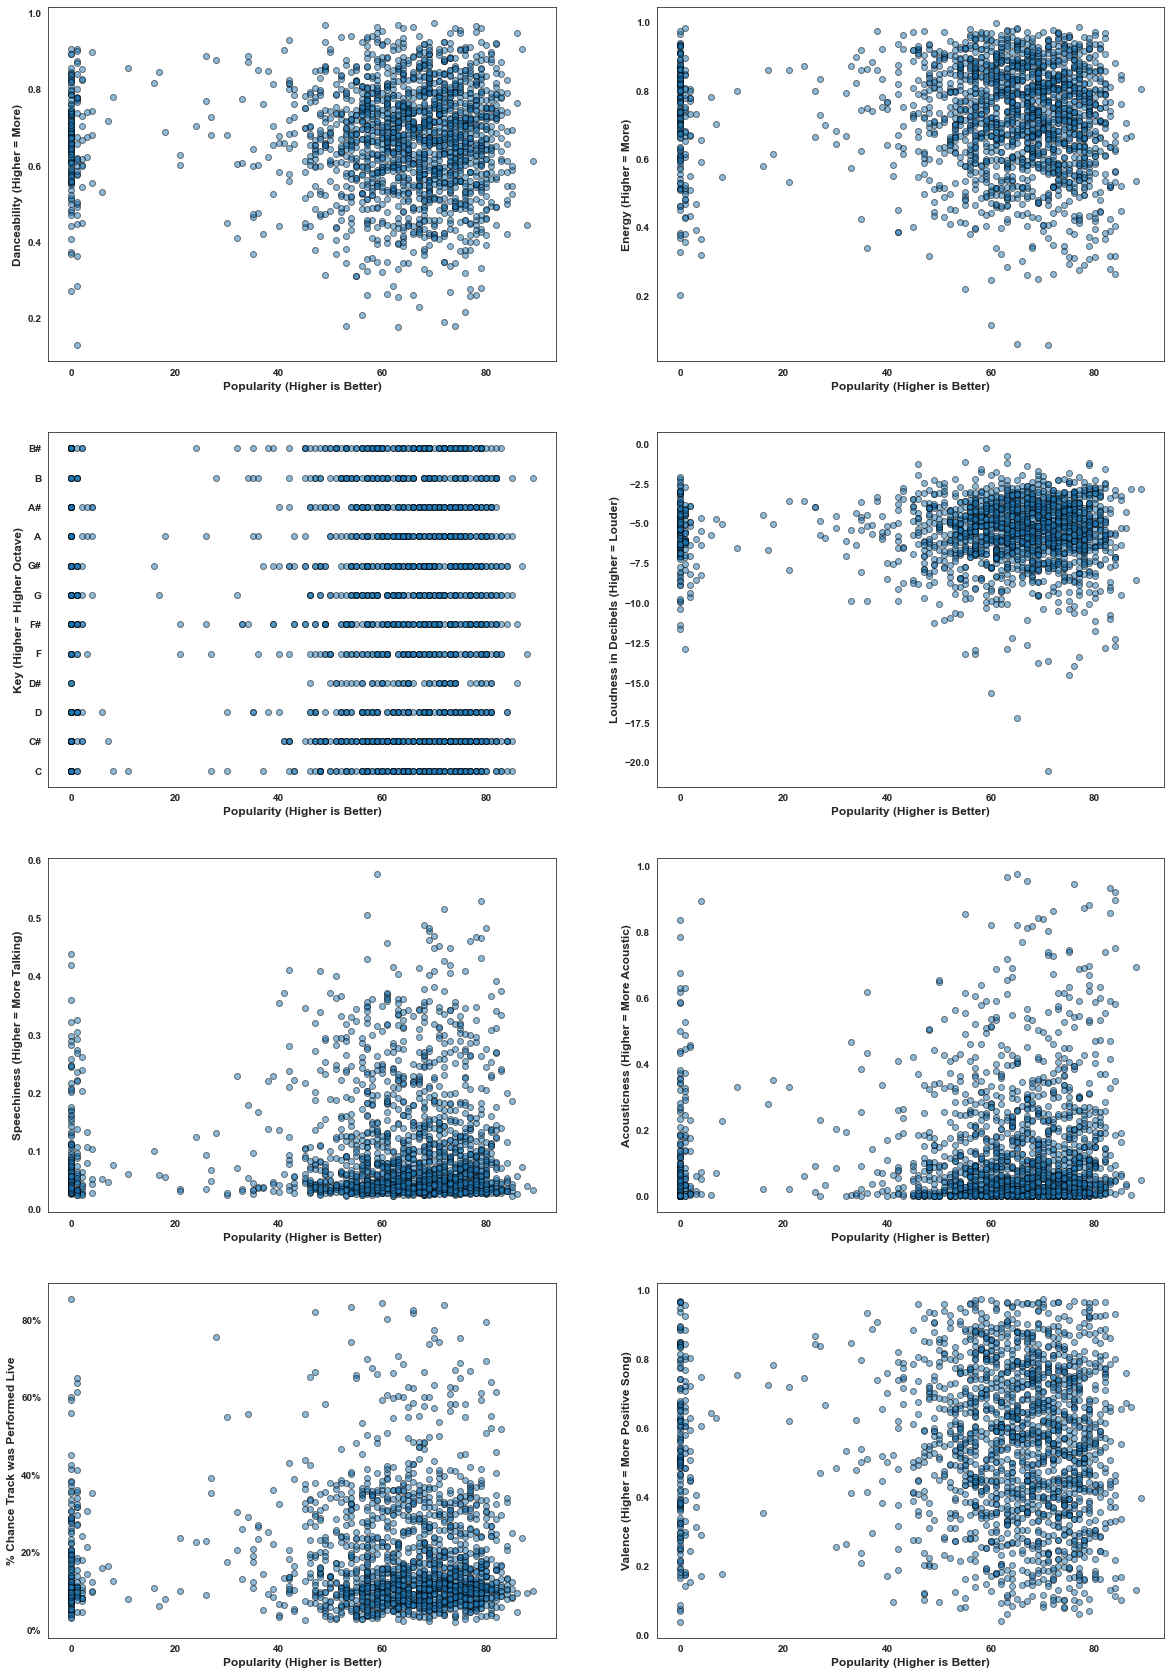

In [17]:
plt.figure(figsize = (20, 30))

plt.subplot(4,2,1)
plt.scatter(spotify['popularity'], spotify['danceability'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Danceability (Higher = More)', fontweight = 'bold', fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.subplot(4,2,2)
plt.scatter(spotify['popularity'], spotify['energy'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Energy (Higher = More)', fontweight = 'bold', fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.subplot(4,2,3)
plt.scatter(spotify['popularity'], spotify['key'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Key (Higher = Higher Octave)', fontweight = 'bold', fontsize = 12)
y_ticks = ['C', 'C#', 'D', 'D#', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'B#']
plt.yticks(range(0, len(y_ticks)), y_ticks, fontweight = 'bold')
plt.xticks(fontweight = 'bold')

plt.subplot(4,2,4)
plt.scatter(spotify['popularity'], spotify['loudness'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Loudness in Decibels (Higher = Louder)', fontweight = 'bold', fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.subplot(4,2,5)
plt.scatter(spotify['popularity'], spotify['speechiness'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Speechiness (Higher = More Talking)', fontweight = 'bold', fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.subplot(4,2,6)
plt.scatter(spotify['popularity'], spotify['acousticness'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Acousticness (Higher = More Acoustic)', fontweight = 'bold', fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.subplot(4,2,7)
plt.scatter(spotify['popularity'], spotify['liveness'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('% Chance Track was Performed Live', fontweight = 'bold', fontsize = 12)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1.0))
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.subplot(4,2,8)
plt.scatter(spotify['popularity'], spotify['valence'], alpha = 0.5, edgecolors = 'black')
plt.xlabel('Popularity (Higher is Better)', fontweight = 'bold', fontsize = 12)
plt.ylabel('Valence (Higher = More Positive Song)', fontweight = 'bold', fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')

plt.show()

## Changes in Average Song Length Over Time:

In [18]:
spotify = pd.read_csv('spotify_top_songs.csv')

In [19]:
spotify['genre'] = spotify['genre'].replace(['Rock'], 'Rock/Alternative')
spotify['genre'] = spotify['genre'].replace(['Alternative'], 'Rock/Alternative')

In [20]:
select_years = spotify[spotify['year'].between(1999, 2019)]

select_time = select_years[select_years['duration_sec'].between(150, 300)]

grouped_df = select_time.groupby(['genre','year'])['duration_sec'].mean().reset_index()

new_df = grouped_df.loc[(grouped_df['genre'] == 'Pop') | (grouped_df['genre'] == 'Hip-Hop/Rap') | 
         (grouped_df['genre'] == 'Dance/Electronic') | (grouped_df['genre'] == 'R&B/Soul') | 
         (grouped_df['genre'] == 'Rock/Alternative')]

print(new_df)

                genre  year  duration_sec
9    Dance/Electronic  1999    228.000000
10   Dance/Electronic  2001    219.833333
11   Dance/Electronic  2003    225.111111
12   Dance/Electronic  2004    193.000000
13   Dance/Electronic  2005    199.333333
..                ...   ...           ...
121  Rock/Alternative  2015    229.090909
122  Rock/Alternative  2016    196.000000
123  Rock/Alternative  2017    195.571429
124  Rock/Alternative  2018    207.333333
125  Rock/Alternative  2019    218.000000

[103 rows x 3 columns]


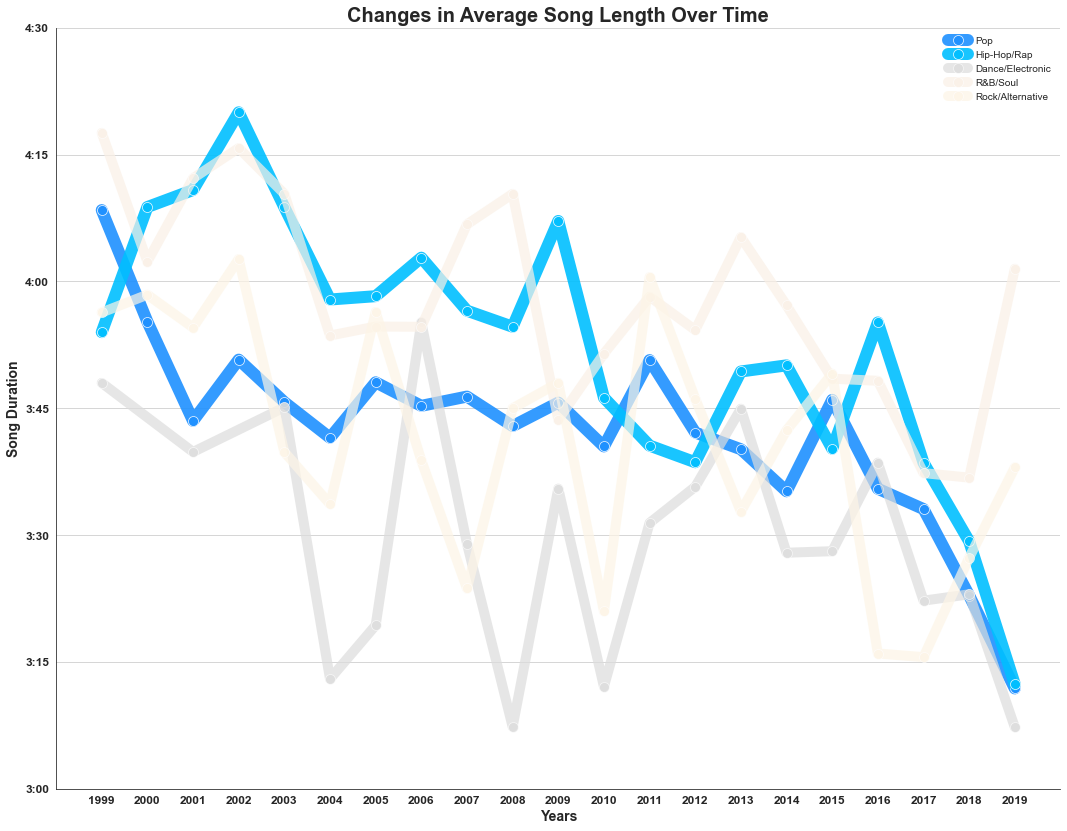

In [21]:
years = [1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 
         2014, 2015, 2016, 2017, 2018, 2019]

plt.figure(figsize = (18,14))

sns.lineplot(data = new_df.loc[new_df['genre'] == 'Pop'], x = 'year', y = 'duration_sec', marker = 'o', 
             markersize = 10, linewidth = 12, color = 'DodgerBlue', alpha = 0.9)
sns.lineplot(data = new_df.loc[new_df['genre'] == 'Hip-Hop/Rap'], x = 'year', y = 'duration_sec', marker = 'o', 
             markersize = 10, linewidth = 12, color = 'DeepSkyBlue', alpha = 0.9)
sns.lineplot(data = new_df.loc[new_df['genre'] == 'Dance/Electronic'], x = 'year', y = 'duration_sec', marker = 'o', 
             markersize = 10, linewidth = 10, color = 'Gainsboro', alpha = 0.7)
sns.lineplot(data = new_df.loc[new_df['genre'] == 'R&B/Soul'], x = 'year', y = 'duration_sec', marker = 'o', 
             markersize = 10, linewidth = 10, color = 'Linen', alpha = 0.7)
sns.lineplot(data = new_df.loc[new_df['genre'] == 'Rock/Alternative'], x = 'year', y = 'duration_sec', marker = 'o', 
             markersize = 10, linewidth = 10, color = 'OldLace', alpha = 0.7)

plt.xticks(years, fontweight = 'bold', fontsize = 12)
plt.yticks([180, 195, 210, 225, 240, 255, 270], 
           labels = ['3:00', '3:15', '3:30', '3:45', '4:00', '4:15', '4:30'], fontweight = 'bold',
          fontsize = 12)
plt.ylabel('Song Duration', fontweight = 'bold', fontsize = 14)
plt.xlabel('Years', fontweight = 'bold', fontsize = 14)
plt.grid(axis = 'y')
plt.title('Changes in Average Song Length Over Time', fontweight = 'bold', fontsize = 20)
plt.legend(labels = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'R&B/Soul', 'Rock/Alternative'], frameon = False)

sns.despine()
plt.show()